In [32]:
# # perform this in colab first:
# !git clone https://github.com/kyleoneil/MLProjs.git
# import os
# os.chdir('MLProjs')
# print('we are currently at:', os.getcwd())

# load dataset

In [6]:
!git clone https://github.com/inoueMashuu/hiragana-dataset.git
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

fatal: destination path 'hiragana-dataset' already exists and is not an empty directory.


In [8]:
import re
import os
import numpy as np
import pandas as pd

dtable = np.array(os.listdir('hiragana-dataset/hiragana_images'))
dtable = dtable.reshape(50,20).transpose()
pattern = re.compile(r'kana([A-Z]+)')
syllables = [pattern.search(f).group(1) for f in dtable[0]]

display (pd.DataFrame(dtable, columns=syllables))

,A,BA,CHI,DA,E,FU,HA,HE,HI,HO,...,TA,TE,TO,TSU,U,WA,WO,YA,YO,YU
0,kanaA0.jpg,kanaBA0.jpg,kanaCHI0.jpg,kanaDA0.jpg,kanaE0.jpg,kanaFU0.jpg,kanaHA0.jpg,kanaHE0.jpg,kanaHI0.jpg,kanaHO0.jpg,...,kanaTA0.jpg,kanaTE0.jpg,kanaTO0.jpg,kanaTSU0.jpg,kanaU0.jpg,kanaWA0.jpg,kanaWO0.jpg,kanaYA0.jpg,kanaYO0.jpg,kanaYU0.jpg
1,kanaA1.jpg,kanaBA1.jpg,kanaCHI1.jpg,kanaDA1.jpg,kanaE1.jpg,kanaFU1.jpg,kanaHA1.jpg,kanaHE1.jpg,kanaHI1.jpg,kanaHO1.jpg,...,kanaTA1.jpg,kanaTE1.jpg,kanaTO1.jpg,kanaTSU1.jpg,kanaU1.jpg,kanaWA1.jpg,kanaWO1.jpg,kanaYA1.jpg,kanaYO1.jpg,kanaYU1.jpg
2,kanaA10.jpg,kanaBA10.jpg,kanaCHI10.jpg,kanaDA10.jpg,kanaE10.jpg,kanaFU10.jpg,kanaHA10.jpg,kanaHE10.jpg,kanaHI10.jpg,kanaHO10.jpg,...,kanaTA10.jpg,kanaTE10.jpg,kanaTO10.jpg,kanaTSU10.jpg,kanaU10.jpg,kanaWA10.jpg,kanaWO10.jpg,kanaYA10.jpg,kanaYO10.jpg,kanaYU10.jpg
3,kanaA11.jpg,kanaBA11.jpg,kanaCHI11.jpg,kanaDA11.jpg,kanaE11.jpg,kanaFU11.jpg,kanaHA11.jpg,kanaHE11.jpg,kanaHI11.jpg,kanaHO11.jpg,...,kanaTA11.jpg,kanaTE11.jpg,kanaTO11.jpg,kanaTSU11.jpg,kanaU11.jpg,kanaWA11.jpg,kanaWO11.jpg,kanaYA11.jpg,kanaYO11.jpg,kanaYU11.jpg
4,kanaA12.jpg,kanaBA12.jpg,kanaCHI12.jpg,kanaDA12.jpg,kanaE12.jpg,kanaFU12.jpg,kanaHA12.jpg,kanaHE12.jpg,kanaHI12.jpg,kanaHO12.jpg,...,kanaTA12.jpg,kanaTE12.jpg,kanaTO12.jpg,kanaTSU12.jpg,kanaU12.jpg,kanaWA12.jpg,kanaWO12.jpg,kanaYA12.jpg,kanaYO12.jpg,kanaYU12.jpg
5,kanaA13.jpg,kanaBA13.jpg,kanaCHI13.jpg,kanaDA13.jpg,kanaE13.jpg,kanaFU13.jpg,kanaHA13.jpg,kanaHE13.jpg,kanaHI13.jpg,kanaHO13.jpg,...,kanaTA13.jpg,kanaTE13.jpg,kanaTO13.jpg,kanaTSU13.jpg,kanaU13.jpg,kanaWA13.jpg,kanaWO13.jpg,kanaYA13.jpg,kanaYO13.jpg,kanaYU13.jpg
6,kanaA14.jpg,kanaBA14.jpg,kanaCHI14.jpg,kanaDA14.jpg,kanaE14.jpg,kanaFU14.jpg,kanaHA14.jpg,kanaHE14.jpg,kanaHI14.jpg,kanaHO14.jpg,...,kanaTA14.jpg,kanaTE14.jpg,kanaTO14.jpg,kanaTSU14.jpg,kanaU14.jpg,kanaWA14.jpg,kanaWO14.jpg,kanaYA14.jpg,kanaYO14.jpg,kanaYU14.jpg
7,kanaA15.jpg,kanaBA15.jpg,kanaCHI15.jpg,kanaDA15.jpg,kanaE15.jpg,kanaFU15.jpg,kanaHA15.jpg,kanaHE15.jpg,kanaHI15.jpg,kanaHO15.jpg,...,kanaTA15.jpg,kanaTE15.jpg,kanaTO15.jpg,kanaTSU15.jpg,kanaU15.jpg,kanaWA15.jpg,kanaWO15.jpg,kanaYA15.jpg,kanaYO15.jpg,kanaYU15.jpg
8,kanaA16.jpg,kanaBA16.jpg,kanaCHI16.jpg,kanaDA16.jpg,kanaE16.jpg,kanaFU16.jpg,kanaHA16.jpg,kanaHE16.jpg,kanaHI16.jpg,kanaHO16.jpg,...,kanaTA16.jpg,kanaTE16.jpg,kanaTO16.jpg,kanaTSU16.jpg,kanaU16.jpg,kanaWA16.jpg,kanaWO16.jpg,kanaYA16.jpg,kanaYO16.jpg,kanaYU16.jpg
9,kanaA17.jpg,kanaBA17.jpg,kanaCHI17.jpg,kanaDA17.jpg,kanaE17.jpg,kanaFU17.jpg,kanaHA17.jpg,kanaHE17.jpg,kanaHI17.jpg,kanaHO17.jpg,...,kanaTA17.jpg,kanaTE17.jpg,kanaTO17.jpg,kanaTSU17.jpg,kanaU17.jpg,kanaWA17.jpg,kanaWO17.jpg,kanaYA17.jpg,kanaYO17.jpg,kanaYU17.jpg


In [9]:
import csv

# Define the kana characters and their corresponding labels
kana_characters = [
    'A', 'I', 'U', 'E', 'O', 'MA', 'MI', 'MU', 'ME', 'MO',
    'KA', 'KI', 'KU', 'KE', 'KO', 'SA', 'SHI', 'SU', 'SE', 'SO',
    'YA', 'YU', 'YO', 'WA', 'WO', 'TA', 'CHI', 'TSU', 'TE', 'TO',
    'NA', 'NI', 'NU', 'NE', 'NO', 'HA', 'HI', 'FU', 'HE', 'HO',
    'RA', 'RI', 'RU', 'RE', 'RO', 'N', 'DA', 'JI', 'BA', 'PI'
]

# Initialize variables
image_data = []
k = 0

# Loop through each kana character and generate image names and labels
for kana in kana_characters:
    for i in range(20):
        image_name = f'hiragana-dataset/hiragana_images/kana{kana}{i}.jpg'
        label = kana
        image_data.append([image_name, label])
    k += 1

# Write the data to a CSV file
csv_file = 'hiragana_dataset2.csv'
with open(csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['ImageName', 'Label'])  # Write header
    csvwriter.writerows(image_data)

print(f'Data successfully written to {csv_file}')

cv = pd.read_csv(csv_file)
cv.head(100)

Data successfully written to hiragana_dataset2.csv


,ImageName,Label
0,hiragana-dataset/hiragana_images/kanaA0.jpg,A
1,hiragana-dataset/hiragana_images/kanaA1.jpg,A
2,hiragana-dataset/hiragana_images/kanaA2.jpg,A
3,hiragana-dataset/hiragana_images/kanaA3.jpg,A
4,hiragana-dataset/hiragana_images/kanaA4.jpg,A
...,...,...
95,hiragana-dataset/hiragana_images/kanaO15.jpg,O
96,hiragana-dataset/hiragana_images/kanaO16.jpg,O
97,hiragana-dataset/hiragana_images/kanaO17.jpg,O
98,hiragana-dataset/hiragana_images/kanaO18.jpg,O


In [10]:
from PIL import Image
img_width, img_height = 64, 64

# Load images and labels
images = []
labels = []

for index, row in cv.iterrows():
    img = Image.open(row['ImageName']).convert('L')  # convert image to grayscale
    img = img.resize((img_width, img_height))
    img_array = np.array(img)
    images.append(img_array)
    labels.append(row['Label'])

images = np.array(images)
images = images.reshape(images.shape[0], img_width, img_height, 1)  # reshape for CNN input
labels = np.array(labels)

print('labels:', set(labels))

labels: {'FU', 'SO', 'PI', 'WA', 'RO', 'TSU', 'BA', 'RE', 'KI', 'N', 'ME', 'NU', 'I', 'RI', 'JI', 'MU', 'YA', 'E', 'SE', 'SA', 'WO', 'U', 'O', 'TE', 'NO', 'NE', 'TO', 'HO', 'KO', 'YO', 'CHI', 'MA', 'SU', 'A', 'HE', 'RU', 'NI', 'KA', 'MI', 'YU', 'DA', 'KE', 'HI', 'HA', 'TA', 'SHI', 'nan', 'KU', 'RA', 'MO'}


999


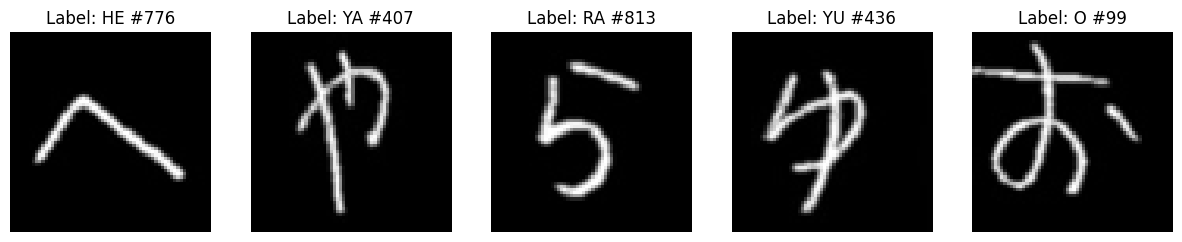

In [11]:
import matplotlib.pyplot as plt
import random

dataset_len = len(labels) - 1
print(dataset_len)
fig, axs = plt.subplots(1,5, figsize=(15,3))
axs = axs.flatten()

for i in range(5):
    ran = random.randint(0, dataset_len)
    ax = axs[i]
    ax.imshow(images[ran].reshape(img_width, img_height), cmap='gray')
    ax.set_title("Label: " + labels[ran] + f' #{ran}')
    ax.axis('off')

# perform CNN method

In [12]:
images_flat = images.reshape(images.shape[0], -1)  # shape will be (1000, 64*64)

# Create a DataFrame
df_images_labels = pd.DataFrame({
    'images': [img.tolist() for img in images_flat],  # convert each image to list
    'labels': labels
})

In [39]:
X = df_images_labels.drop('labels', axis=1)
y = df_images_labels['images']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# perform XGBoost method